# Klasifikasi Gambar rockscissorspaper
Datasets source : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

Made by Ainul Yaqin.

In [214]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

from keras import optimizers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [215]:
# Cek versi tensorflow
print(tf.__version__)

2.3.0


Tensorflow yang terinstall harus versi diatas 2.0, jika dibawah itu install tensor flow menggunakan :
`pip install tensorflow`

In [216]:
# Melihat folder yang ada di datasets yang sudah diekstrak
os.listdir('rockpaperscissors/')

['README_rpc-cv-images.txt', 'rps-cv-images', 'sample']

In [217]:
# Melihat folder yang ada di rps-CV-images
os.listdir('rockpaperscissors/rps-cv-images/')

['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']

In [218]:
rps_images = 'rockpaperscissors/rps-cv-images/'
gambar_batu = 'rock'
gambar_kertas ='paper'
gambar_gunting = 'scissors'

# Membuat direktori masing-masing data gambar
data_batu = os.listdir(os.path.join(rps_images,gambar_batu))
data_kertas = os.listdir(os.path.join(rps_images,gambar_kertas))
data_gunting = os.listdir(os.path.join(rps_images,gambar_gunting))

# Cek jumlah gambar setiap folder
print(f'Jumlah data gambar batu : {len(data_batu)}')
print(f'Jumlah data gambar kertas : {len(data_kertas)}')
print(f'Jumlah data gambar gunting : {len(data_gunting)}')

Jumlah data gambar batu : 726
Jumlah data gambar kertas : 712
Jumlah data gambar gunting : 750


### Split training image and validation image using ImageDataGenerator

In [219]:
# Sesuai dengan ketentuan tugas akhir, ukuran validation set adalah 40%
image_gen = ImageDataGenerator(validation_split=0.4, rescale = 1./255)

# split into training and validation images
train_gen = image_gen.flow_from_directory(rps_images,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    subset='training')

val_gen = image_gen.flow_from_directory(rps_images,
                                                    target_size=(150,150),
                                                    batch_size=4,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Data training berjumlah 1314 gambar yang terdiri dari 3 kelas, yaitu rock, scissors dan paper.<br/>
Data validasi berjumlah 874 gambar yang terdiri dari 3 kelas, yaitu rock, scissors dan paper.

### Membuat model MLP (Multi Layer Perceptron)

In [220]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  # Hidden layer
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(512,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# Melihat ringkasan dari model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

### Melatih model yang sudah dibuat

In [221]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [222]:
history = model.fit(
    train_gen, 
    validation_data  = val_gen,
    epochs = 35,
    steps_per_epoch = 30,
    verbose=1)

Epoch 1/35
30/30 [==============================] - 29s 961ms/step - loss: 1.1112 - accuracy: 0.3475 - val_loss: 1.0944 - val_accuracy: 0.5561
Epoch 2/35
30/30 [==============================] - 24s 787ms/step - loss: 1.0528 - accuracy: 0.5083 - val_loss: 0.8043 - val_accuracy: 0.6716
Epoch 3/35
30/30 [==============================] - 23s 770ms/step - loss: 0.5924 - accuracy: 0.7917 - val_loss: 0.5050 - val_accuracy: 0.7872
Epoch 4/35
30/30 [==============================] - 23s 766ms/step - loss: 0.4006 - accuracy: 0.8917 - val_loss: 0.4410 - val_accuracy: 0.8261
Epoch 5/35
30/30 [==============================] - 23s 755ms/step - loss: 0.3230 - accuracy: 0.9083 - val_loss: 0.3196 - val_accuracy: 0.8810
Epoch 6/35
30/30 [==============================] - 23s 765ms/step - loss: 0.2985 - accuracy: 0.9068 - val_loss: 0.2493 - val_accuracy: 0.9142
Epoch 7/35
30/30 [==============================] - 23s 776ms/step - loss: 0.1681 - accuracy: 0.9417 - val_loss: 0.3083 - val_accuracy: 0.9073

Akurasi yang didapatkan setidaknya harus diatas 95% dan waktu training tidak lebih dari 30 menit.<br/>
Jika hal tersebut terpenuhi, maka model bisa dikatakan bagus.

### Mencoba untuk memprediksi gambar dari sample gambar

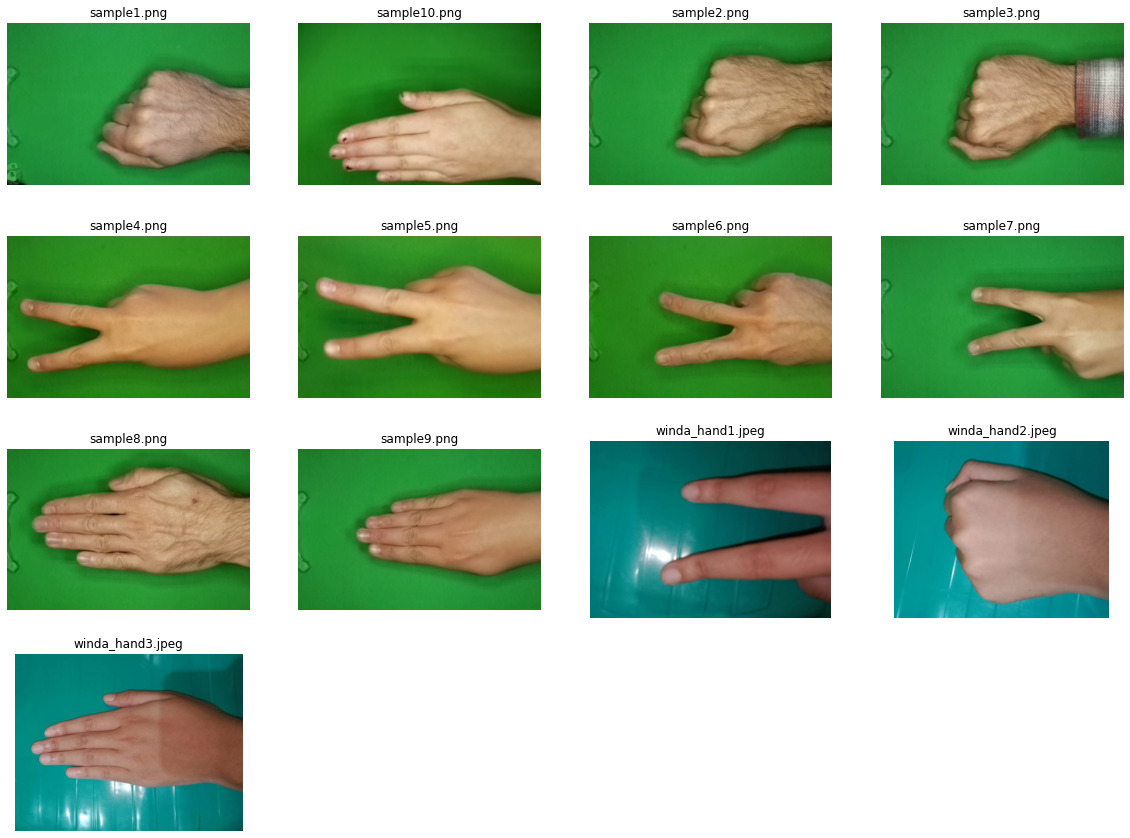

In [271]:
base_dir = os.listdir('rockpaperscissors/sample/')

image_sample = []
for i in base_dir:
    image_sample.append(image.load_img(f'rockpaperscissors/sample/{i}'))

fig = plt.figure(figsize=(20, 15))
rows = 4
columns = 4

for i in range(len(image_sample)):
    fig.add_subplot(rows, columns, i+1)
    plt.title(base_dir[i])
    plt.axis('off')
    plt.imshow(image_sample[i])

#### Pilih sampel gambar diatas untuk diprediksi dengan mengetik nama filenya
Contoh : `winda_hand1.jpeg`

In [269]:
# Memilih file sampel gambar diatas
sample_name = input("Ketik pilihan sample gambar : ")

Ketik pilihan sample gambar : winda_hand1.jpeg


rockpaperscissors/sample/winda_hand1.jpeg 

Gambar terdeteksi : Gunting


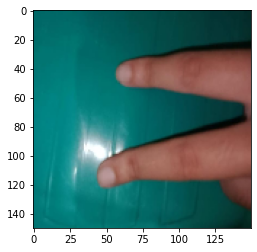

In [270]:
# path file sampel gambar
path = f'rockpaperscissors/sample/{sample_name}'

# Tranformasi dan prediksi gambar
img = image.load_img(path, target_size =(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=4)

print(path,'\n')
if classes[0,0]!=0:
    print('Gambar terdeteksi : Kertas')
elif classes[0,1]!=0:
    print('Gambar terdeteksi : Batu')
else:
    print('Gambar terdeteksi : Gunting')

### Plotting Train and Validation Acuraccy

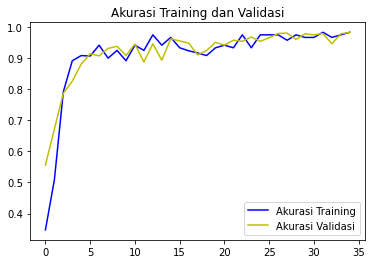

In [267]:
Akurasi_train = history.history['accuracy']
Akurasi_val = history.history['val_accuracy']

epochs = range(len(Akurasi_train))

plt.plot(epochs, Akurasi_train, 'b', label='Akurasi Training')
plt.plot(epochs, Akurasi_val, 'y', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.show()

### Plotting Train and Validation Loss

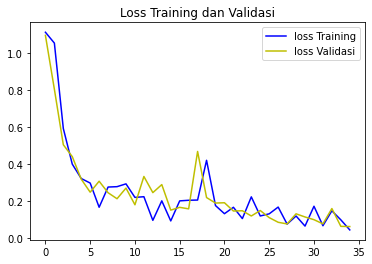

In [268]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(len(Akurasi_train))

plt.plot(epochs, loss_train, 'b', label='loss Training')
plt.plot(epochs, loss_val, 'y', label='loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend(loc=0)
plt.show()